In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print()
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']

(1140, 62, 47)


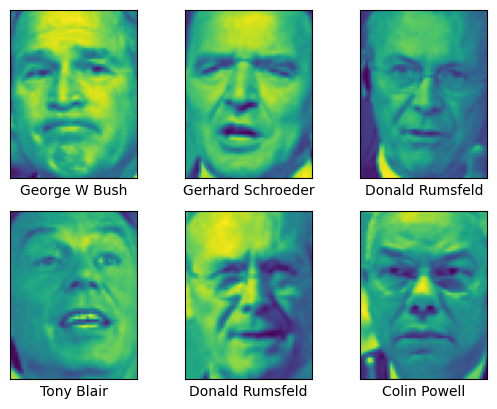

In [8]:
fig,ax=plt.subplots(2,3)
for i ,axi in enumerate(ax.flat):
 axi.imshow(faces.images[i])
 axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (855, 2914)

Training data-y- Shape:	 (855,)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (285, 2914)

Testing data(y-Outcome) Shape:	 (285,)


In [11]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
pipe_model=make_pipeline(pca,svc)
#train the model
from sklearn.model_selection import GridSearchCV # to get optimum parameter
param_grid={'svc__C':[1,5,10,20,50],
 'svc__gamma':[0.0001,0.0005,0.001,0.005]
 }
grid=GridSearchCV(pipe_model,param_grid)
%time grid.fit(xtrain,ytrain)
print(grid.best_params_)

CPU times: total: 1min 27s
Wall time: 42.8 s
{'svc__C': 1, 'svc__gamma': 0.005}


In [12]:
model=grid.best_estimator_
print(model)


Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=1, class_weight='balanced', gamma=0.005))])


In [13]:
yfit=model.predict(xtest)
yfit

array([2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 4, 0, 0, 2, 0, 2, 0, 1, 4, 2,
       0, 1, 4, 2, 0, 1, 2, 2, 0, 3, 2, 2, 2, 2, 4, 2, 2, 4, 0, 0, 2, 4,
       2, 0, 2, 1, 2, 0, 3, 2, 0, 2, 4, 0, 2, 0, 2, 3, 0, 3, 2, 2, 4, 2,
       3, 4, 2, 1, 0, 1, 3, 1, 2, 4, 3, 2, 2, 2, 1, 0, 0, 4, 2, 2, 4, 4,
       4, 2, 0, 2, 2, 2, 2, 0, 4, 4, 2, 0, 1, 2, 0, 1, 3, 2, 3, 0, 2, 2,
       1, 2, 2, 4, 4, 2, 0, 3, 1, 0, 1, 3, 0, 3, 4, 2, 0, 0, 0, 2, 0, 0,
       4, 2, 1, 0, 2, 4, 0, 2, 2, 2, 2, 2, 3, 2, 2, 4, 0, 1, 2, 2, 4, 2,
       2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 4, 0,
       0, 2, 2, 0, 2, 3, 0, 1, 2, 4, 4, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       3, 2, 2, 3, 0, 4, 2, 0, 2, 2, 0, 1, 2, 2, 2, 3, 2, 2, 4, 2, 0, 2,
       1, 3, 0, 2, 2, 1, 4, 2, 0, 2, 2, 2, 0, 4, 2, 0, 0, 0, 2, 1, 2, 0,
       0, 3, 4, 2, 2, 0, 0, 3, 2, 0, 0, 2, 2, 4, 2, 1, 4, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 4, 3, 0, 4, 0, 2, 2, 2, 2, 2, 2, 0, 4, 2, 2],
      dtype=int64)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

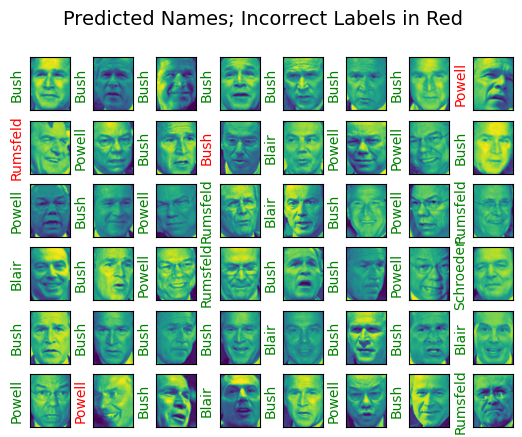

In [14]:
fig,ax=plt.subplots(6,8)
for i ,axi in enumerate(ax.flat):
 axi.imshow(xtest[i].reshape(62,47))
 axi.set(xticks=[],yticks=[])
 axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

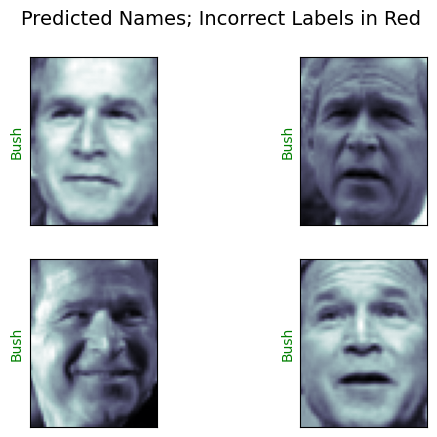

In [16]:
fig,ax=plt.subplots(2,2)
for i ,axi in enumerate(ax.flat):
 axi.imshow(xtest[i].reshape(62,47),cmap='bone')
 axi.set(xticks=[],yticks=[])
 axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green' if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

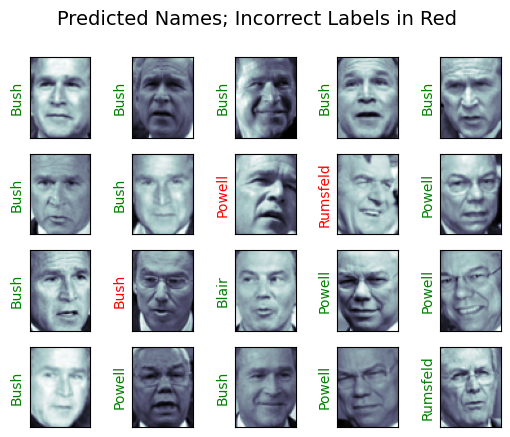

In [17]:
fig,ax=plt.subplots(4,5)
for i ,axi in enumerate(ax.flat):
 axi.imshow(xtest[i].reshape(62,47),cmap='bone')
 axi.set(xticks=[],yticks=[])
 axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)